In [11]:
import os
import requests
import pandas as pd
import json

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

data = pd.read_csv('C://Users//ratan//automated_data_pipeline//output//MSI_stock_data.csv')
data.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

display(data)

print(data.columns)

,Open,High,Low,Close,Volume,Daily Range
Date,,,,,,
2024-07-09,391.22,392.3400,389.64,390.72,627079,2.7000
2024-07-10,392.52,392.5200,387.98,391.05,636579,4.5400
2024-07-11,390.36,392.8002,386.53,388.69,604886,6.2702
2024-07-12,389.30,394.5000,388.84,390.16,482627,5.6600
2024-07-15,390.34,394.6000,390.06,394.39,535002,4.5400
...,...,...,...,...,...,...
2024-11-20,489.96,493.5200,485.18,492.60,588912,8.3400
2024-11-21,494.66,496.2712,491.30,494.84,688968,4.9712
2024-11-22,497.14,502.4600,496.37,500.90,520517,6.0900


Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Daily Range'], dtype='object')


In [14]:
print(data.index)

DatetimeIndex(['2024-07-09', '2024-07-10', '2024-07-11', '2024-07-12',
               '2024-07-15', '2024-07-16', '2024-07-17', '2024-07-18',
               '2024-07-19', '2024-07-22', '2024-07-23', '2024-07-24',
               '2024-07-25', '2024-07-26', '2024-07-29', '2024-07-30',
               '2024-07-31', '2024-08-01', '2024-08-02', '2024-08-05',
               '2024-08-06', '2024-08-07', '2024-08-08', '2024-08-09',
               '2024-08-12', '2024-08-13', '2024-08-14', '2024-08-15',
               '2024-08-16', '2024-08-19', '2024-08-20', '2024-08-21',
               '2024-08-22', '2024-08-23', '2024-08-26', '2024-08-27',
               '2024-08-28', '2024-08-29', '2024-08-30', '2024-09-03',
               '2024-09-04', '2024-09-05', '2024-09-06', '2024-09-09',
               '2024-09-10', '2024-09-11', '2024-09-12', '2024-09-13',
               '2024-09-16', '2024-09-17', '2024-09-18', '2024-09-19',
               '2024-09-20', '2024-09-23', '2024-09-24', '2024-09-25',
      

In [15]:
# Forward-fill to handle missing values
data = data.asfreq('D').fillna(method='ffill')

# Ensure model sees the true value on 2024-11-21
data.loc['2024-11-26', 'Close'] = 496.58

# Use the most recent 3 months of data
train = data.loc['2024-07-09':]

In [16]:
model = ARIMA(train['Close'], order=(5, 1, 0))  # Test orders (5, 1, 0), (1, 1, 1), etc.
model_fit = model.fit()

# Forecast the next 5 days
forecast_steps = 5
forecast = model_fit.forecast(steps=forecast_steps)

# Align forecast with observed dates
forecast.index = pd.date_range(
    start=data.index[-1] + pd.Timedelta(days=1),
    periods=forecast_steps,
    freq='D'
)

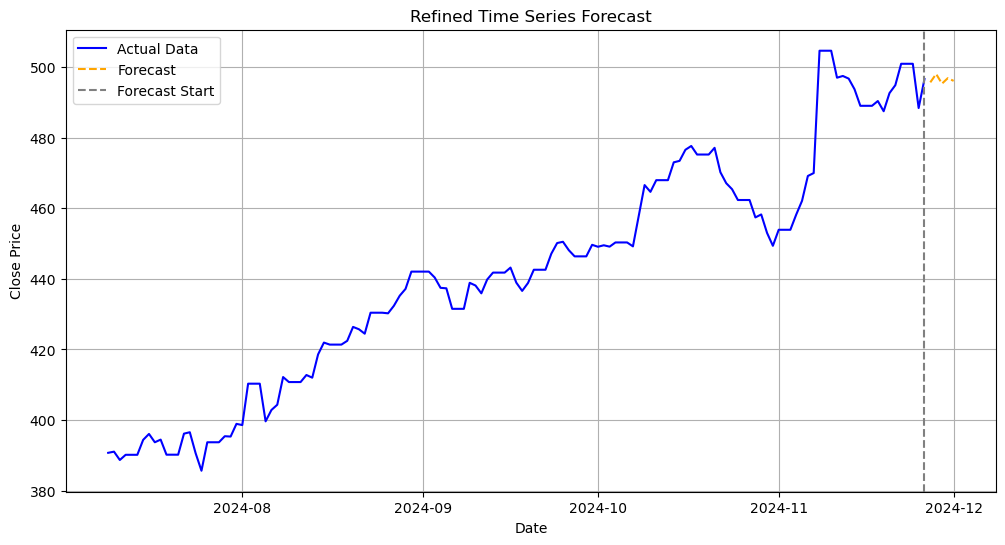

Forecasted Values:
2024-11-27    495.646338
2024-11-28    498.013322
2024-11-29    495.278996
2024-11-30    496.830015
2024-12-01    496.060007
Freq: D, Name: predicted_mean, dtype: float64


In [17]:
# Plot the actual data and forecast
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Actual Data', color='blue')
plt.plot(forecast.index, forecast, label='Forecast', color='orange', linestyle='--')
plt.axvline(x=train.index[-1], color='gray', linestyle='--', label='Forecast Start')

# Add labels and legend
plt.title("Refined Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid()

# Show plot
plt.show()

print("Forecasted Values:")
print(forecast)

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

data = pd.read_csv('C://Users//ratan//automated_data_pipeline//scripts//output//MSI_stock.csv')
data.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

display(data)

print(data.columns)

,Open,High,Low,Close,Volume,Daily Range
Date,,,,,,
2024-07-09,391.22,392.3400,389.64,390.72,627079,2.7000
2024-07-10,392.52,392.5200,387.98,391.05,636579,4.5400
2024-07-11,390.36,392.8002,386.53,388.69,604886,6.2702
2024-07-12,389.30,394.5000,388.84,390.16,482627,5.6600
2024-07-15,390.34,394.6000,390.06,394.39,535002,4.5400
...,...,...,...,...,...,...
2024-11-18,488.63,494.3800,486.61,490.35,664306,7.7700
2024-11-19,487.81,489.9400,484.53,487.46,484333,5.4100
2024-11-20,489.96,493.5200,485.18,492.60,588912,8.3400


Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Daily Range'], dtype='object')


In [20]:
print(data.index)

DatetimeIndex(['2024-07-09', '2024-07-10', '2024-07-11', '2024-07-12',
               '2024-07-15', '2024-07-16', '2024-07-17', '2024-07-18',
               '2024-07-19', '2024-07-22', '2024-07-23', '2024-07-24',
               '2024-07-25', '2024-07-26', '2024-07-29', '2024-07-30',
               '2024-07-31', '2024-08-01', '2024-08-02', '2024-08-05',
               '2024-08-06', '2024-08-07', '2024-08-08', '2024-08-09',
               '2024-08-12', '2024-08-13', '2024-08-14', '2024-08-15',
               '2024-08-16', '2024-08-19', '2024-08-20', '2024-08-21',
               '2024-08-22', '2024-08-23', '2024-08-26', '2024-08-27',
               '2024-08-28', '2024-08-29', '2024-08-30', '2024-09-03',
               '2024-09-04', '2024-09-05', '2024-09-06', '2024-09-09',
               '2024-09-10', '2024-09-11', '2024-09-12', '2024-09-13',
               '2024-09-16', '2024-09-17', '2024-09-18', '2024-09-19',
               '2024-09-20', '2024-09-23', '2024-09-24', '2024-09-25',
      

In [34]:
# Forward-fill to handle missing values
data = data.asfreq('D').fillna(method='ffill')

# Ensure model sees the true value on 2024-11-21
data.loc['2024-11-25', 'Close'] = 488.37

# Use the most recent 3 months of data
train = data.loc['2024-07-09':]

In [37]:
model = ARIMA(train['Close'], order=(5, 1, 0))  # Test orders (5, 1, 0), (1, 1, 1), etc.
model_fit = model.fit()

# Forecast the next 5 days
forecast_steps = 30
forecast = model_fit.forecast(steps=forecast_steps)

# Align forecast with observed dates
forecast.index = pd.date_range(
    start=data.index[-1] + pd.Timedelta(days=1),
    periods=forecast_steps,
    freq='D'
)

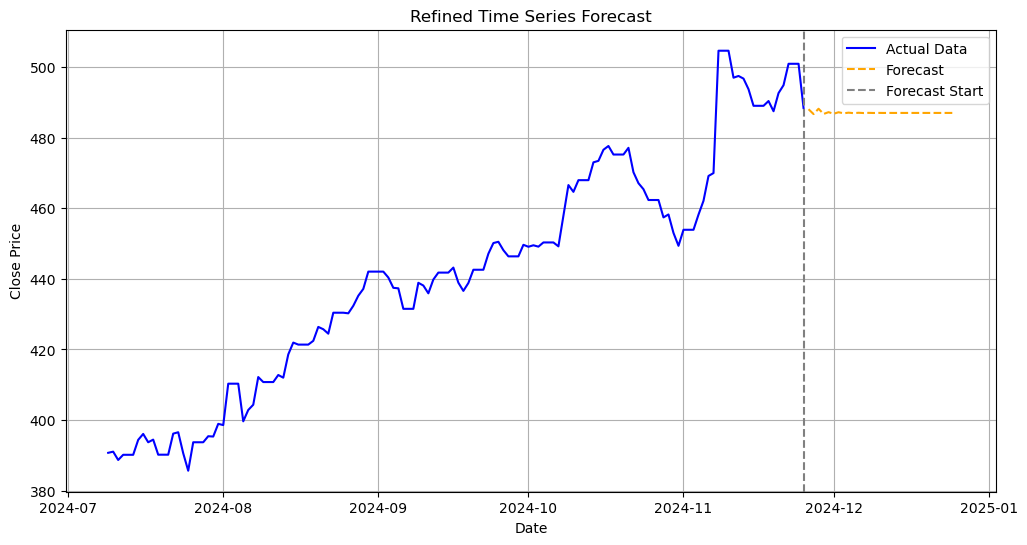

Forecasted Values:
2024-11-26    488.028485
2024-11-27    486.655934
2024-11-28    488.168233
2024-11-29    486.686663
2024-11-30    487.200654
2024-12-01    486.746622
2024-12-02    487.175884
2024-12-03    486.877867
2024-12-04    487.057991
2024-12-05    486.918378
2024-12-06    487.028187
2024-12-07    486.951960
2024-12-08    487.004764
2024-12-09    486.965380
2024-12-10    486.994462
2024-12-11    486.973812
2024-12-12    486.988620
2024-12-13    486.977777
2024-12-14    486.985652
2024-12-15    486.979993
2024-12-16    486.984083
2024-12-17    486.981111
2024-12-18    486.983262
2024-12-19    486.981709
2024-12-20    486.982833
2024-12-21    486.982019
2024-12-22    486.982608
2024-12-23    486.982182
2024-12-24    486.982490
2024-12-25    486.982267
Freq: D, Name: predicted_mean, dtype: float64


In [38]:
# Plot the actual data and forecast
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Actual Data', color='blue')
plt.plot(forecast.index, forecast, label='Forecast', color='orange', linestyle='--')
plt.axvline(x=train.index[-1], color='gray', linestyle='--', label='Forecast Start')

# Add labels and legend
plt.title("Refined Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid()

# Show plot
plt.show()

print("Forecasted Values:")
print(forecast)